# SimpleHouseSlab notebook example

In this example, a rule based controller is used to control the model "SimpleHouseSlab-v0". At first we import the controller:

In [1]:
#from energym.examples.Controller import LabController

Next, we import Energym and create the simulation environment by specifying the model, a weather file and the number of simulation days.

In [2]:
import energym

#weather = "ESP_CT_Barcelona"
env = energym.make("SimpleHouseSlab-v0", simulation_days=20)

The control inputs can be inspected using the `get_inputs_names()` method and to construct a controller, we pass the list of inputs and further parameters. This controller determines inputs to get close to the temperature setpoints and uses fixed setpoints during the night.

In [3]:
inputs = env.get_inputs_names()[:] # exclude battery setpoints
print(inputs)
#controller = LabController(control_list=inputs, lower_tol=0.3, upper_tol=0.8, nighttime_setback=True, nighttime_start=18, nighttime_end=6, nighttime_temp=18)

['u']


To run the simulation, a number of steps is specified (here 288 steps per day for 10 days) and the obtained control inputs are passed to the simulation model with the `step()` method. To generate some plots later on, we save all the inputs and outputs in lists.

In [4]:
from scipy import signal

steps = 288*10
out_list = []
outputs = env.get_output()
controls = []
hour = 0
for i in range(steps):
    #control = controller.get_control(outputs, 21, hour)
    control = {}
    control['u'] = [0.5*(signal.square(0.1*i)+1.0)]
    controls +=[ {p:control[p][0] for p in control} ]
    outputs = env.step(control)
    _,hour,_,_ = env.get_date()
    out_list.append(outputs)

[OK] %s
[WARNING] %s


Since the inputs and outputs are given as dictionaries and are collected in lists, we can simply load them as a pandas.DataFrame.

In [5]:
import pandas as pd
out_df = pd.DataFrame(out_list)

In [6]:
out_df

,TOut.T,heaPum.P,heaPum.QCon_flow,sla.surf_a.Q_flow,temRet.T,temRoo.T,temSup.T,y,time
0,281.769647,10000.0,4.441887e+04,-512.486410,301.564868,292.992427,311.580864,292.992427,300.0
1,281.739409,10000.0,4.089566e+04,-981.535586,307.111065,292.850197,316.987256,292.850197,600.0
2,281.709272,10000.0,3.887150e+04,-1633.482627,310.766066,292.725649,320.543219,292.725649,900.0
3,281.679220,10000.0,3.753105e+04,-2510.766120,313.407336,292.624818,323.081520,292.624818,1200.0
4,281.649238,10000.0,3.655962e+04,-3562.067217,315.451491,292.553302,325.025473,292.553302,1500.0
...,...,...,...,...,...,...,...,...,...
2875,270.774889,0.0,5.002222e-12,-13870.571997,342.656353,306.687090,350.466125,306.687090,862800.0
2876,270.749500,0.0,5.002222e-12,-13475.492745,342.656353,306.561975,350.466125,306.561975,863100.0
2877,270.725000,0.0,5.002222e-12,-13112.969374,342.656353,306.427279,350.466125,306.427279,863400.0
2878,270.701722,0.0,5.002222e-12,-12780.170538,342.656353,306.284071,350.466125,306.284071,863700.0


To generate plots, we can directly get the data from the DataFrames, by using the key names. Displayed are the zone temperatures and the setpoints determined by the controller for zone 1 as well as the corresponding heat pump on/off switching, the external temperature, and the total power demand.

<IPython.core.display.Javascript object>


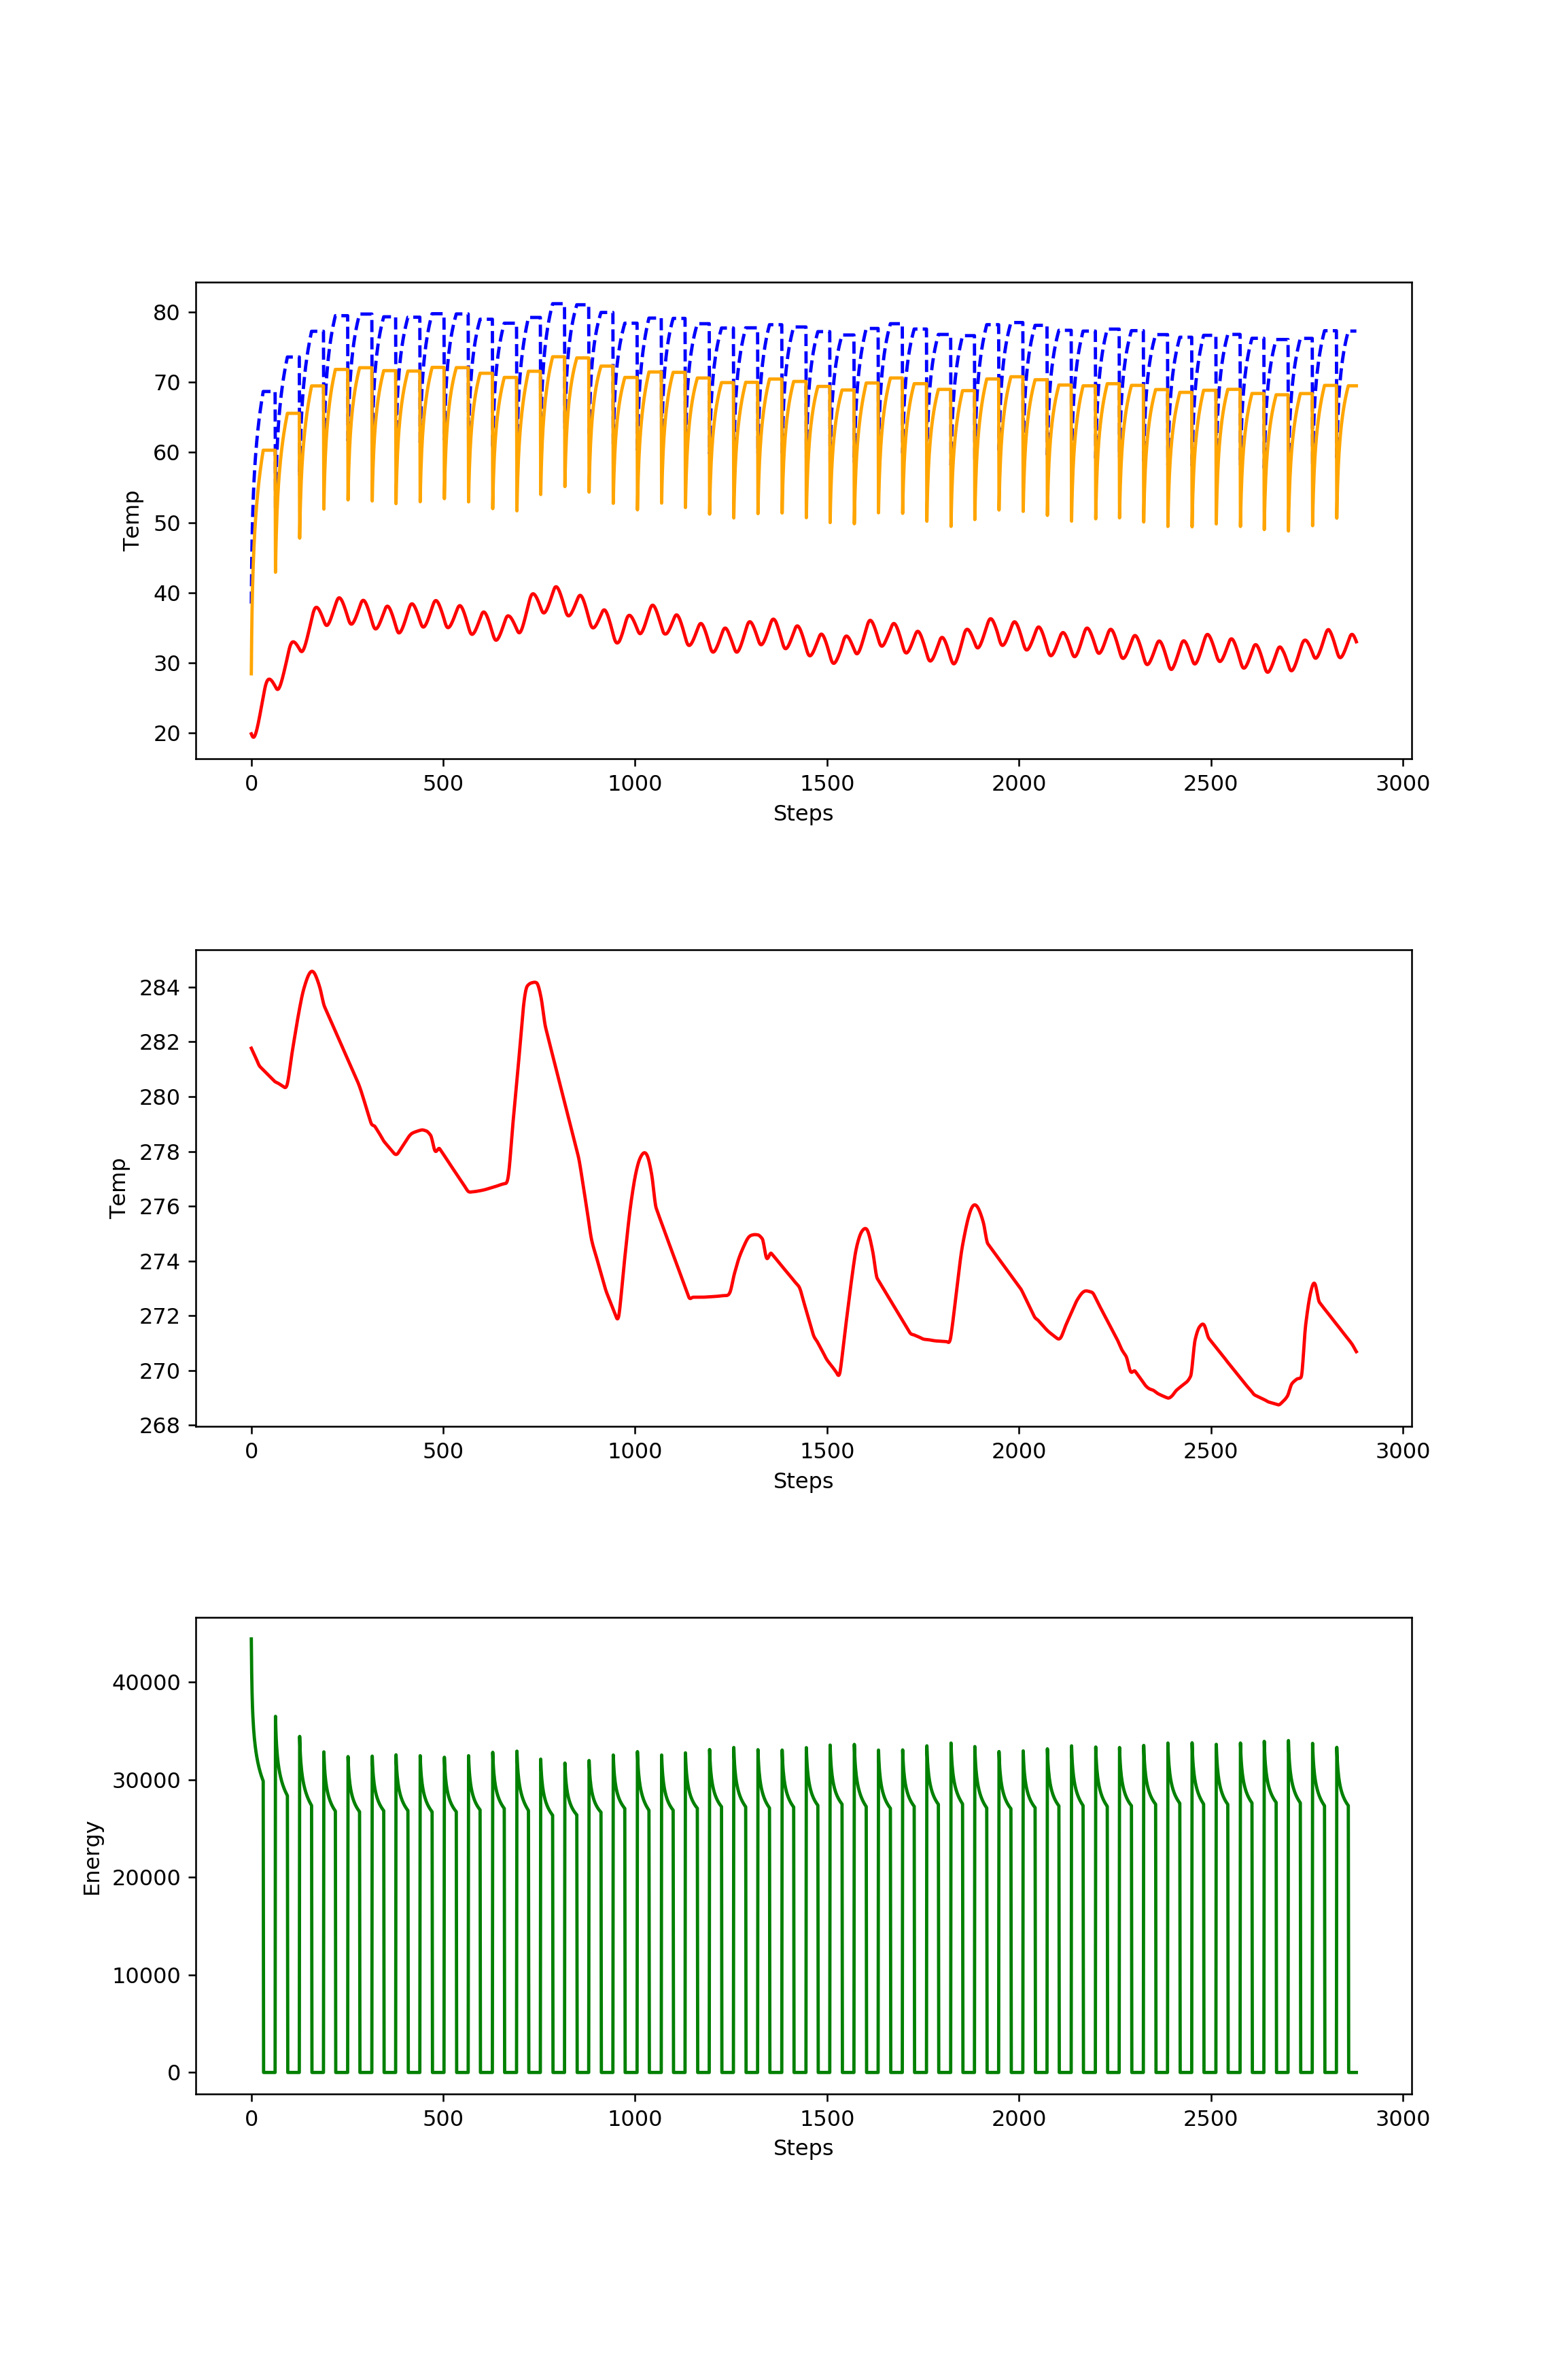

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

f, (ax1,ax2,ax3) = plt.subplots(3,figsize=(10,15))#


ax1.plot(out_df['temRoo.T']-273.15, 'r')
ax1.plot(out_df['temSup.T']-273.15, 'b--')
ax1.plot(out_df['temRet.T']-273.15, 'orange')
ax1.set_ylabel('Temp')
ax1.set_xlabel('Steps')

ax2.plot(out_df['TOut.T'], 'r')
ax2.set_ylabel('Temp')
ax2.set_xlabel('Steps')

ax3.plot(out_df['heaPum.QCon_flow'], 'g')
ax3.set_ylabel('Energy')
ax3.set_xlabel('Steps')

plt.subplots_adjust(hspace=0.4)

plt.show()

To end the simulation, the `close()` method is called. It deletes files that were produced during the simulation and stores some information about the simulation in the *runs* folder.

In [7]:
env.close()

[OK] fmiTerminateSlave: fmiFreeInstanceSlave must be called to free the FMU instance.

[OK] fmiFreeSlaveInstance: The function fmiFreeSlaveInstance of instance %s is executed.

[OK] freeInstanceResources: %s will be freed.

